In [44]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
import seaborn as sns
import plotly.express as px
from itertools import product
import warnings
import statsmodels.api as sm
plt.style.use('seaborn-darkgrid')

In [46]:
# Reading the csv file
bitstamp = pd.read_csv(r"/content/drive/MyDrive/Colab Notebooks/bitstampUSD_1-min_data_2012-01-01_to_2020-09-14.csv")
bitstamp.head()

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
0,1325317920,4.39,4.39,4.39,4.39,0.455581,2.0,4.39
1,1325317980,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1325318040,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1325318100,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1325318160,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [47]:
bitstamp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4572257 entries, 0 to 4572256
Data columns (total 8 columns):
 #   Column             Dtype  
---  ------             -----  
 0   Timestamp          int64  
 1   Open               float64
 2   High               float64
 3   Low                float64
 4   Close              float64
 5   Volume_(BTC)       float64
 6   Volume_(Currency)  float64
 7   Weighted_Price     float64
dtypes: float64(7), int64(1)
memory usage: 279.1 MB


In [48]:
bitstamp_non_indexed = bitstamp.copy()

In [49]:
# Converting the Timestamp column from string to datetime
bitstamp['Timestamp'] = [datetime.fromtimestamp(x) for x in bitstamp['Timestamp']]

In [36]:
bitstamp.head()

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
0,2011-12-31 07:52:00,4.39,4.39,4.39,4.39,0.455581,2.0,4.39
1,2011-12-31 07:53:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2011-12-31 07:54:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2011-12-31 07:55:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2011-12-31 07:56:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [37]:
print('Dataset Shape: ',  bitstamp.shape)

Dataset Shape:  (3603136, 8)


In [1]:
bitstamp.set_index("Timestamp").Weighted_Price.plot(figsize=(14,7), title="Bitcoin Weighted Price")


NameError: name 'bitstamp' is not defined

In [52]:
#calculating missing values in the dataset

missing_values = bitstamp.isnull().sum()
missing_per = (missing_values/bitstamp.shape[0])*100
missing_table = pd.concat([missing_values,missing_per], axis=1, ignore_index=True) 
missing_table.rename(columns={0:'Total Missing Values',1:'Missing %'}, inplace=True)
missing_table

,Total Missing Values,Missing %
Timestamp,0,0.000000
Open,1241716,27.157616
High,1241716,27.157616
Low,1241716,27.157616
Close,1241716,27.157616
Volume_(BTC),1241716,27.157616
Volume_(Currency),1241716,27.157616
Weighted_Price,1241716,27.157616


In [38]:

bitstamp = bitstamp.set_index('Timestamp')
bitstamp.head()

,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
Timestamp,,,,,,,
2011-12-31 07:52:00,4.39,4.39,4.39,4.39,0.455581,2.0,4.39
2011-12-31 07:53:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-12-31 07:54:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-12-31 07:55:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-12-31 07:56:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [53]:
#testing missing value methods on a subset

pd.set_option('display.max_rows', 1500)

a = bitstamp.set_index('Timestamp')

a = a['2019-11-01 00:15:00':'2019-11-01 02:24:00']

a['ffill'] = a['Weighted_Price'].fillna(method='ffill') # Imputation using ffill/pad
a['bfill'] = a['Weighted_Price'].fillna(method='bfill') # Imputation using bfill/pad
a['interp'] = a['Weighted_Price'].interpolate()         # Imputation using interpolation

a

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price,ffill,bfill,interp
Timestamp,,,,,,,,,,
2019-11-01 00:15:00,9132.07,9132.07,9131.28,9132.06,2.790997,25486.770016,9131.781301,9131.781301,9131.781301,9131.781301
2019-11-01 00:16:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9131.781301,9124.030314,9127.905808
2019-11-01 00:17:00,9133.46,9133.46,9124.00,9124.00,4.615205,42109.267498,9124.030314,9124.030314,9124.030314,9124.030314
2019-11-01 00:18:00,9127.51,9127.91,9123.83,9123.83,0.115982,1058.256390,9124.345653,9124.345653,9124.345653,9124.345653
2019-11-01 00:19:00,9123.68,9127.88,9119.24,9119.24,0.844218,7702.491217,9123.816937,9123.816937,9123.816937,9123.816937
2019-11-01 00:20:00,9126.28,9127.91,9125.71,9125.71,0.041975,383.073893,9126.269690,9126.269690,9126.269690,9126.269690
2019-11-01 00:21:00,9126.87,9127.90,9112.05,9118.12,2.015965,18385.049732,9119.727734,9119.727734,9119.727734,9119.727734
2019-11-01 00:22:00,9117.64,9131.03,9116.99,9131.03,9.102945,83046.782409,9123.067760,9123.067760,9123.067760,9123.067760
2019-11-01 00:23:00,9131.54,9134.49,9119.13,9128.74,2.181277,19900.076044,9123.129221,9123.129221,9123.129221,9123.129221


In [54]:
def fill_missing(df):
    ### function to impute missing values using interpolation ###
    df['Open'] = df['Open'].interpolate()
    df['Close'] = df['Close'].interpolate()
    df['Weighted_Price'] = df['Weighted_Price'].interpolate()

    df['Volume_(BTC)'] = df['Volume_(BTC)'].interpolate()
    df['Volume_(Currency)'] = df['Volume_(Currency)'].interpolate()
    df['High'] = df['High'].interpolate()
    df['Low'] = df['Low'].interpolate()

    print(df.head())
    print(df.isnull().sum())

In [55]:
fill_missing(bitstamp)

            Timestamp  Open  High   Low  Close  Volume_(BTC)  \
0 2011-12-31 07:52:00  4.39  4.39  4.39   4.39      0.455581   
1 2011-12-31 07:53:00  4.39  4.39  4.39   4.39      0.555046   
2 2011-12-31 07:54:00  4.39  4.39  4.39   4.39      0.654511   
3 2011-12-31 07:55:00  4.39  4.39  4.39   4.39      0.753977   
4 2011-12-31 07:56:00  4.39  4.39  4.39   4.39      0.853442   

   Volume_(Currency)  Weighted_Price  
0           2.000000            4.39  
1           2.436653            4.39  
2           2.873305            4.39  
3           3.309958            4.39  
4           3.746611            4.39  
Timestamp            0
Open                 0
High                 0
Low                  0
Close                0
Volume_(BTC)         0
Volume_(Currency)    0
Weighted_Price       0
dtype: int64


In [56]:
#created a copy 
bitstamp_non_indexed = bitstamp.copy()

In [57]:
bitstamp = bitstamp.set_index('Timestamp')
bitstamp.head()

,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
Timestamp,,,,,,,
2011-12-31 07:52:00,4.39,4.39,4.39,4.39,0.455581,2.000000,4.39
2011-12-31 07:53:00,4.39,4.39,4.39,4.39,0.555046,2.436653,4.39
2011-12-31 07:54:00,4.39,4.39,4.39,4.39,0.654511,2.873305,4.39
2011-12-31 07:55:00,4.39,4.39,4.39,4.39,0.753977,3.309958,4.39
2011-12-31 07:56:00,4.39,4.39,4.39,4.39,0.853442,3.746611,4.39


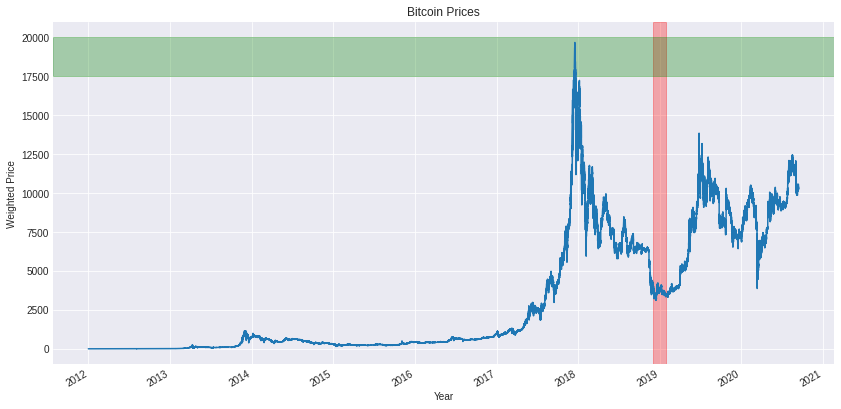

In [58]:
ax = bitstamp['Weighted_Price'].plot(title='Bitcoin Prices', grid=True, figsize=(14,7))
ax.set_xlabel('Year')
ax.set_ylabel('Weighted Price')

ax.axvspan('2018-12-01','2019-01-31',color='red', alpha=0.3)
ax.axhspan(17500,20000, color='green',alpha=0.3)

Text(0, 0.5, 'Weighted_Price')

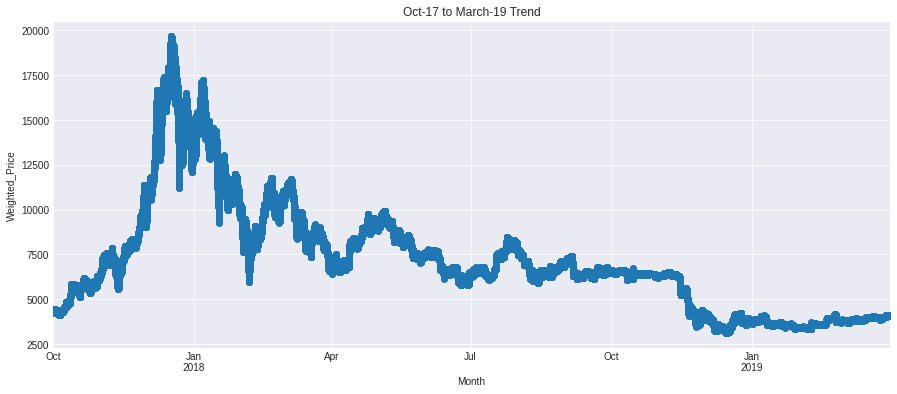

In [59]:
#Zooming in

ax = bitstamp.loc['2017-10':'2019-03','Weighted_Price'].plot(marker='o', linestyle='-',figsize=(15,6), title="Oct-17 to March-19 Trend", grid=True)
ax.set_xlabel('Month')
ax.set_ylabel('Weighted_Price')

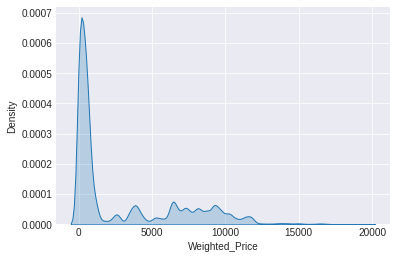

In [60]:
sns.kdeplot(bitstamp['Weighted_Price'], shade=True)

No handles with labels found to put in legend.


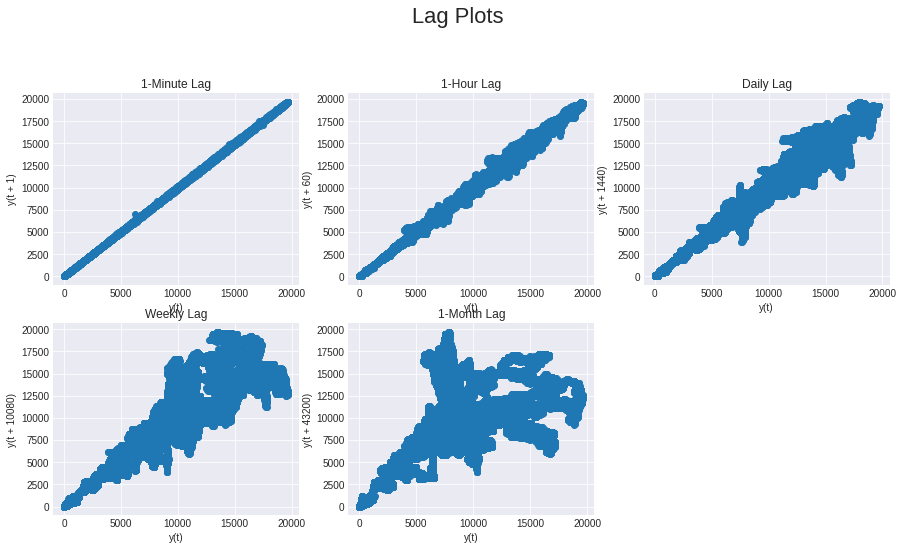

In [61]:
plt.figure(figsize=(15,12))
plt.suptitle('Lag Plots', fontsize=22)

plt.subplot(3,3,1)
pd.plotting.lag_plot(bitstamp['Weighted_Price'], lag=1) #minute lag
plt.title('1-Minute Lag')

plt.subplot(3,3,2)
pd.plotting.lag_plot(bitstamp['Weighted_Price'], lag=60) #hourley lag
plt.title('1-Hour Lag')

plt.subplot(3,3,3)
pd.plotting.lag_plot(bitstamp['Weighted_Price'], lag=1440) #Daily lag
plt.title('Daily Lag')

plt.subplot(3,3,4)
pd.plotting.lag_plot(bitstamp['Weighted_Price'], lag=10080) #weekly lag
plt.title('Weekly Lag')

plt.subplot(3,3,5)
pd.plotting.lag_plot(bitstamp['Weighted_Price'], lag=43200) #month lag
plt.title('1-Month Lag')

plt.legend()
plt.show()


In [62]:
hourly_data = bitstamp.resample('1H').mean()
hourly_data = hourly_data.reset_index()

hourly_data.head()

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
0,2011-12-31 07:00:00,4.39,4.39,4.39,4.39,0.803709,3.528285,4.39
1,2011-12-31 08:00:00,4.39,4.39,4.39,4.39,4.185530,18.374477,4.39
2,2011-12-31 09:00:00,4.39,4.39,4.39,4.39,10.153449,44.573640,4.39
3,2011-12-31 10:00:00,4.39,4.39,4.39,4.39,16.121368,70.772803,4.39
4,2011-12-31 11:00:00,4.39,4.39,4.39,4.39,22.089286,96.971967,4.39


In [63]:
bitstamp_daily = bitstamp.resample("24H").mean() #daily resampling

In [64]:
import plotly.express as px

bitstamp_daily.reset_index(inplace=True)
fig = px.line(bitstamp_daily, x='Timestamp', y='Weighted_Price', title='Weighted Price with Range Slider and Selectors')
fig.update_layout(hovermode="x")

fig.update_xaxes(
    rangeslider_visible=True,
    rangeselector=dict(
        buttons=list([
            dict(count=1, label="1m", step="month", stepmode="backward"),
            dict(count=6, label="6m", step="month", stepmode="backward"),
            dict(count=1, label="1y", step="year", stepmode="backward"),
            dict(count=2, label="2y", step="year", stepmode="backward"),
            dict(step="all")
            
        ])
    )
)
fig.show()

In [65]:
plot_ = bitstamp_daily.set_index("Timestamp")["2017-12"]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning:

Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.



In [66]:
import plotly.graph_objects as go

fig = go.Figure(data=go.Candlestick(x= plot_.index,
                    open=plot_['Open'],
                    high=plot_['High'],
                    low=plot_['Low'],
                    close=plot_['Close']))
fig.show()

In [40]:
price_series = bitstamp_daily.reset_index().Weighted_Price.values
price_series

array([4.47160287e+00, 4.80666667e+00, 5.00000000e+00, ...,
       6.44840023e+03, 6.36511324e+03, 6.35459487e+03])

In [67]:
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import kpss
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [68]:
fill_missing(bitstamp_daily)

   Timestamp      Open      High       Low     Close  Volume_(BTC)  \
0 2011-12-31  4.476415  4.478946  4.476415  4.478946     17.940426   
1 2012-01-01  4.765576  4.765576  4.765576  4.765576      6.790640   
2 2012-01-02  5.006549  5.006549  5.006549  5.006549     15.183373   
3 2012-01-03  5.206530  5.206530  5.206530  5.206530      7.917041   
4 2012-01-04  5.202511  5.241699  5.202511  5.241699     13.659736   

   Volume_(Currency)  Weighted_Price  
0          79.495594        4.477370  
1          32.971105        4.765576  
2          75.932706        5.006549  
3          40.795994        5.206530  
4          72.860096        5.216680  
Timestamp            0
Open                 0
High                 0
Low                  0
Close                0
Volume_(BTC)         0
Volume_(Currency)    0
Weighted_Price       0
dtype: int64


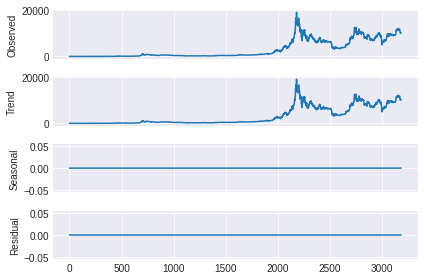

<Figure size 1080x864 with 0 Axes>

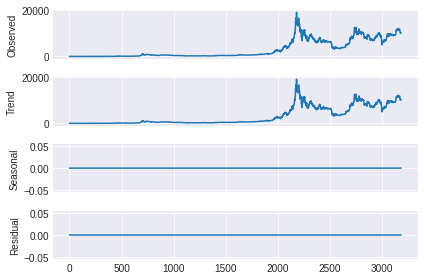

In [81]:
plt.figure(figsize=(15,12))
series = bitstamp_daily.Weighted_Price
result = seasonal_decompose(series, model='additive',freq=1)
result.plot()

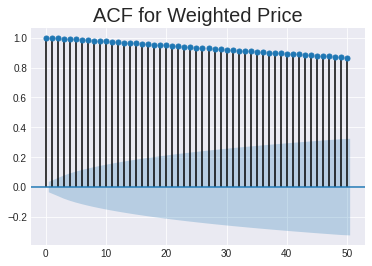

In [82]:
acf = plot_acf(series, lags=50, alpha=0.05)
plt.title("ACF for Weighted Price", size=20)
plt.show()

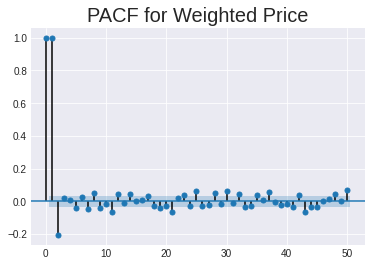

In [83]:
plot_pacf(series, lags=50, alpha=0.05, method='ols')
plt.title("PACF for Weighted Price", size=20)
plt.show()

In [84]:
stats, p, lags, critical_values = kpss(series, 'ct')

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/stattools.py:1685: FutureWarning:

The behavior of using lags=None will change in the next release. Currently lags=None is the same as lags='legacy', and so a sample-size lag length is used. After the next release, the default will change to be the same as lags='auto' which uses an automatic lag length selection method. To silence this warning, either use 'auto' or 'legacy'

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/stattools.py:1709: InterpolationWarning:

p-value is smaller than the indicated p-value



In [85]:
print(f'Test Statistics : {stats}')
print(f'p-value : {p}')
print(f'Critical Values : {critical_values}')

if p < 0.05:
    print('Series is not Stationary')
else:
    print('Series is Stationary')

Test Statistics : 0.971974343041707
p-value : 0.01
Critical Values : {'10%': 0.119, '5%': 0.146, '2.5%': 0.176, '1%': 0.216}
Series is not Stationary


In [86]:
def adf_test(timeseries):
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
       dfoutput['Critical Value (%s)'%key] = value
    
    print (dfoutput)
    
    if p > 0.05:
        print('Series is not Stationary')
    else:
        print('Series is Stationary')
        
adf_test(series)

Results of Dickey-Fuller Test:
Test Statistic                   -1.257922
p-value                           0.648197
#Lags Used                       29.000000
Number of Observations Used    3151.000000
Critical Value (1%)              -3.432427
Critical Value (5%)              -2.862458
Critical Value (10%)             -2.567259
dtype: float64
Series is Stationary


In [87]:
df = bitstamp_daily.set_index("Timestamp")

In [88]:
df.reset_index(drop=False, inplace=True)

lag_features = ["Open", "High", "Low", "Close","Volume_(BTC)"]
window1 = 3
window2 = 7
window3 = 30

df_rolled_3d = df[lag_features].rolling(window=window1, min_periods=0)
df_rolled_7d = df[lag_features].rolling(window=window2, min_periods=0)
df_rolled_30d = df[lag_features].rolling(window=window3, min_periods=0)

df_mean_3d = df_rolled_3d.mean().shift(1).reset_index()
df_mean_7d = df_rolled_7d.mean().shift(1).reset_index()
df_mean_30d = df_rolled_30d.mean().shift(1).reset_index()

df_std_3d = df_rolled_3d.std().shift(1).reset_index()
df_std_7d = df_rolled_7d.std().shift(1).reset_index()
df_std_30d = df_rolled_30d.std().shift(1).reset_index()

for feature in lag_features:
    df[f"{feature}_mean_lag{window1}"] = df_mean_3d[feature]
    df[f"{feature}_mean_lag{window2}"] = df_mean_7d[feature]
    df[f"{feature}_mean_lag{window3}"] = df_mean_30d[feature]
    
    df[f"{feature}_std_lag{window1}"] = df_std_3d[feature]
    df[f"{feature}_std_lag{window2}"] = df_std_7d[feature]
    df[f"{feature}_std_lag{window3}"] = df_std_30d[feature]

df.fillna(df.mean(), inplace=True)

df.set_index("Timestamp", drop=False, inplace=True)
df.head()


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:29: FutureWarning:

DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.



,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price,Open_mean_lag3,Open_mean_lag7,...,Close_mean_lag30,Close_std_lag3,Close_std_lag7,Close_std_lag30,Volume_(BTC)_mean_lag3,Volume_(BTC)_mean_lag7,Volume_(BTC)_mean_lag30,Volume_(BTC)_std_lag3,Volume_(BTC)_std_lag7,Volume_(BTC)_std_lag30
Timestamp,,,,,,,,,,,,,,,,,,,,,
2011-12-31,2011-12-31,4.476415,4.478946,4.476415,4.478946,17.940426,79.495594,4.477370,3070.007835,3063.529743,...,3023.843754,70.836828,118.491226,269.127206,9.811957,9.817411,9.825918,3.522567,4.288554,5.298253
2012-01-01,2012-01-01,4.765576,4.765576,4.765576,4.765576,6.790640,32.971105,4.765576,4.476415,4.476415,...,4.478946,70.836828,118.491226,269.127206,17.940426,17.940426,17.940426,3.522567,4.288554,5.298253
2012-01-02,2012-01-02,5.006549,5.006549,5.006549,5.006549,15.183373,75.932706,5.006549,4.620996,4.620996,...,4.622261,0.202678,0.202678,0.202678,12.365533,12.365533,12.365533,7.884089,7.884089,7.884089
2012-01-03,2012-01-03,5.206530,5.206530,5.206530,5.206530,7.917041,40.795994,5.206530,4.749513,4.749513,...,4.750357,0.264130,0.264130,0.264130,13.304813,13.304813,13.304813,5.807423,5.807423,5.807423
2012-01-04,2012-01-04,5.202511,5.241699,5.202511,5.241699,13.659736,72.860096,5.216680,4.992885,4.863768,...,4.864400,0.220794,0.313900,0.313900,9.963685,11.957870,11.957870,4.555332,5.453543,5.453543


In [89]:
df["month"] = df.Timestamp.dt.month
df["week"] = df.Timestamp.dt.week
df["day"] = df.Timestamp.dt.day
df["day_of_week"] = df.Timestamp.dt.dayofweek
df.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning:

Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.



,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price,Open_mean_lag3,Open_mean_lag7,...,Volume_(BTC)_mean_lag3,Volume_(BTC)_mean_lag7,Volume_(BTC)_mean_lag30,Volume_(BTC)_std_lag3,Volume_(BTC)_std_lag7,Volume_(BTC)_std_lag30,month,week,day,day_of_week
Timestamp,,,,,,,,,,,,,,,,,,,,,
2011-12-31,2011-12-31,4.476415,4.478946,4.476415,4.478946,17.940426,79.495594,4.477370,3070.007835,3063.529743,...,9.811957,9.817411,9.825918,3.522567,4.288554,5.298253,12,52,31,5
2012-01-01,2012-01-01,4.765576,4.765576,4.765576,4.765576,6.790640,32.971105,4.765576,4.476415,4.476415,...,17.940426,17.940426,17.940426,3.522567,4.288554,5.298253,1,52,1,6
2012-01-02,2012-01-02,5.006549,5.006549,5.006549,5.006549,15.183373,75.932706,5.006549,4.620996,4.620996,...,12.365533,12.365533,12.365533,7.884089,7.884089,7.884089,1,1,2,0
2012-01-03,2012-01-03,5.206530,5.206530,5.206530,5.206530,7.917041,40.795994,5.206530,4.749513,4.749513,...,13.304813,13.304813,13.304813,5.807423,5.807423,5.807423,1,1,3,1
2012-01-04,2012-01-04,5.202511,5.241699,5.202511,5.241699,13.659736,72.860096,5.216680,4.992885,4.863768,...,9.963685,11.957870,11.957870,4.555332,5.453543,5.453543,1,1,4,2


In [98]:
df_train = df[df.Timestamp < "2020"]
df_valid = df[df.Timestamp >= "2020"]

print('train shape :', df_train.shape)
print('validation shape :', df_valid.shape)

train shape : (2923, 42)
validation shape : (258, 42)


In [97]:
price_series = bitstamp_daily.reset_index().Weighted_Price.values
price_series

array([4.47737025e+00, 4.76557639e+00, 5.00654859e+00, ...,
       1.03731430e+04, 1.03957982e+04, 1.03324294e+04])

In [91]:
price_series.shape

(3181,)

In [92]:
# Feature Scaling
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range = (0, 1))
price_series_scaled = scaler.fit_transform(price_series.reshape(-1,1))

In [93]:
price_series_scaled, price_series_scaled.shape

(array([[6.08556702e-06],
        [2.11105388e-05],
        [3.36730766e-05],
        ...,
        [5.40552894e-01],
        [5.41733970e-01],
        [5.38430384e-01]]), (3181, 1))

In [94]:
train_data, test_data = price_series_scaled[0:2923], price_series_scaled[2923:]

In [95]:
test_data

array([[0.37491768],
       [0.36849274],
       [0.37605608],
       [0.38148647],
       [0.38712802],
       [0.39252016],
       [0.41317751],
       [0.42912486],
       [0.41155098],
       [0.41099899],
       [0.42274381],
       [0.42265234],
       [0.42219322],
       [0.44679055],
       [0.45560518],
       [0.45199251],
       [0.46129351],
       [0.46332625],
       [0.46101572],
       [0.4504458 ],
       [0.45052091],
       [0.45153659],
       [0.43955893],
       [0.4368209 ],
       [0.43359932],
       [0.43921931],
       [0.4545379 ],
       [0.47113893],
       [0.48622488],
       [0.48830269],
       [0.48681115],
       [0.48838555],
       [0.48862304],
       [0.48619293],
       [0.47954694],
       [0.48996769],
       [0.5049084 ],
       [0.50946061],
       [0.51134823],
       [0.5253092 ],
       [0.51705421],
       [0.51888869],
       [0.53904608],
       [0.53602273],
       [0.53476191],
       [0.52860138],
       [0.51617516],
       [0.506

In [96]:
train_data.shape, test_data.shape

((2923, 1), (258, 1))

In [127]:
X_train

array([[[6.08556702e-06],
        [2.11105388e-05],
        [3.36730766e-05],
        ...,
        [2.99308284e-05],
        [2.53120583e-05],
        [2.05474542e-05]],

       [[2.11105388e-05],
        [3.36730766e-05],
        [4.40986590e-05],
        ...,
        [2.53120583e-05],
        [2.05474542e-05],
        [2.00950296e-05]],

       [[3.36730766e-05],
        [4.40986590e-05],
        [4.46277741e-05],
        ...,
        [2.05474542e-05],
        [2.00950296e-05],
        [2.34730156e-05]],

       ...,

       [[5.20584050e-01],
        [5.30178928e-01],
        [5.23164627e-01],
        ...,
        [3.75707950e-01],
        [3.76218892e-01],
        [3.74704325e-01]],

       [[5.30178928e-01],
        [5.23164627e-01],
        [5.20013510e-01],
        ...,
        [3.76218892e-01],
        [3.74704325e-01],
        [3.80277627e-01]],

       [[5.23164627e-01],
        [5.20013510e-01],
        [5.14764662e-01],
        ...,
        [3.74704325e-01],
        [3.8027

In [128]:
def windowed_dataset(series, time_step):
    dataX, dataY = [], []
    for i in range(len(series)- time_step-1):
        a = series[i : (i+time_step), 0]
        dataX.append(a)
        dataY.append(series[i+ time_step, 0])
        
    return np.array(dataX), np.array(dataY)

In [100]:
X_train, y_train = windowed_dataset(train_data, time_step=100)
X_test, y_test = windowed_dataset(test_data, time_step=100)

In [101]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((2822, 100), (2822,), (157, 100), (157,))

In [102]:
#reshape inputs to be [samples, timesteps, features] which is requred for LSTM

X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)


print(X_train.shape) 
print(X_test.shape)

(2822, 100, 1)
(157, 100, 1)


In [103]:
print(y_train.shape) 
print(y_test.shape)

(2822,)
(157,)


In [104]:
#Create Stacked LSTM Model

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dropout

In [105]:
# Initialising the LSTM
regressor = Sequential()

# Adding the first LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))

# Adding a second LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

# Adding a third LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

# Adding a fourth LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

# Adding the output layer
regressor.add(Dense(units = 1))

# Compiling the RNN
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [106]:
regressor.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 dropout (Dropout)           (None, 100, 50)           0         
                                                                 
 lstm_1 (LSTM)               (None, 100, 50)           20200     
                                                                 
 dropout_1 (Dropout)         (None, 100, 50)           0         
                                                                 
 lstm_2 (LSTM)               (None, 100, 50)           20200     
                                                                 
 dropout_2 (Dropout)         (None, 100, 50)           0         
                                                                 
 lstm_3 (LSTM)               (None, 50)                2

In [107]:
# Fitting the RNN to the Training set
history = regressor.fit(X_train, y_train, validation_split=0.1, epochs = 50, batch_size = 32, verbose=1, shuffle=False)

Epoch 1/50
80/80 [==============================] - 30s 226ms/step - loss: 0.0072 - val_loss: 0.0598
Epoch 2/50
80/80 [==============================] - 16s 201ms/step - loss: 0.0210 - val_loss: 0.0500
Epoch 3/50
80/80 [==============================] - 16s 202ms/step - loss: 0.0217 - val_loss: 0.0118
Epoch 4/50
80/80 [==============================] - 16s 201ms/step - loss: 0.0246 - val_loss: 0.0048
Epoch 5/50
80/80 [==============================] - 16s 203ms/step - loss: 0.0087 - val_loss: 0.0215
Epoch 6/50
80/80 [==============================] - 16s 202ms/step - loss: 0.0093 - val_loss: 0.0030
Epoch 7/50
80/80 [==============================] - 16s 201ms/step - loss: 0.0043 - val_loss: 0.0029
Epoch 8/50
80/80 [==============================] - 16s 200ms/step - loss: 0.0031 - val_loss: 0.0023
Epoch 9/50
80/80 [==============================] - 16s 201ms/step - loss: 0.0033 - val_loss: 0.0025
Epoch 10/50
80/80 [==============================] - 16s 201ms/step - loss: 0.0032 - val_lo

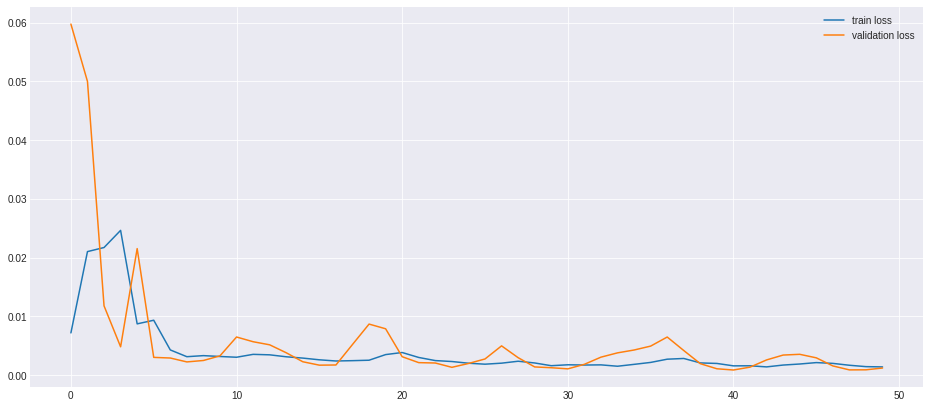

In [108]:
plt.figure(figsize=(16,7))
plt.plot(history.history["loss"], label= "train loss")
plt.plot(history.history["val_loss"], label= "validation loss")
plt.legend()

In [112]:
#Lets do the prediction and performance checking

train_predict = regressor.predict(X_train)
test_predict = regressor.predict(X_test)
print(test_predict)

[[0.35450384]
 [0.35824046]
 [0.35789847]
 [0.35487536]
 [0.34986386]
 [0.34467962]
 [0.34008253]
 [0.3370027 ]
 [0.3363176 ]
 [0.33810169]
 [0.34158063]
 [0.34511754]
 [0.34690556]
 [0.34729573]
 [0.34825283]
 [0.35137984]
 [0.35646093]
 [0.36256877]
 [0.3690393 ]
 [0.37500605]
 [0.38238975]
 [0.39435464]
 [0.40900245]
 [0.42363766]
 [0.43635264]
 [0.44450787]
 [0.44870335]
 [0.4513255 ]
 [0.45526263]
 [0.4631875 ]
 [0.4725705 ]
 [0.47437316]
 [0.4681998 ]
 [0.4578459 ]
 [0.44846195]
 [0.44528055]
 [0.44814387]
 [0.45398834]
 [0.4615119 ]
 [0.46964717]
 [0.47669417]
 [0.48169345]
 [0.48202553]
 [0.47743303]
 [0.47048554]
 [0.46299487]
 [0.4546813 ]
 [0.44674957]
 [0.44123003]
 [0.44029024]
 [0.4441768 ]
 [0.4514084 ]
 [0.45992354]
 [0.46797863]
 [0.47616398]
 [0.48172194]
 [0.4848665 ]
 [0.48639578]
 [0.48622507]
 [0.48474026]
 [0.48325667]
 [0.4822398 ]
 [0.48221558]
 [0.4821198 ]
 [0.48019028]
 [0.4767878 ]
 [0.4727871 ]
 [0.46814921]
 [0.46501818]
 [0.46367073]
 [0.46353012]
 [0.46

In [129]:
#transformation to original form

y_train_inv = scaler.inverse_transform(y_train.reshape(-1, 1))
y_test_inv = scaler.inverse_transform(y_test.reshape(-1, 1))
train_predict_inv = scaler.inverse_transform(train_predict)
test_predict_inv = scaler.inverse_transform(test_predict)
print(y_test_inv)

[[ 6976.30624203]
 [ 6871.94345909]
 [ 6947.87803   ]
 [ 6751.70685631]
 [ 6884.61106872]
 [ 6801.8162349 ]
 [ 6912.4954132 ]
 [ 7071.97079441]
 [ 7152.37871189]
 [ 7167.8373069 ]
 [ 7052.47481895]
 [ 6867.56422278]
 [ 7000.48837044]
 [ 7294.03035521]
 [ 7521.66496367]
 [ 7546.96929677]
 [ 7601.42011381]
 [ 7715.97716508]
 [ 7730.79847711]
 [ 8244.81773005]
 [ 8894.27598485]
 [ 8784.23729479]
 [ 8873.30749644]
 [ 8980.49813109]
 [ 8772.6056095 ]
 [ 8930.89784977]
 [ 9162.65638208]
 [ 9490.68228907]
 [ 9924.47161151]
 [ 9727.26452001]
 [ 8687.5145762 ]
 [ 8706.86781146]
 [ 8774.17437174]
 [ 9045.37065621]
 [ 9576.83866785]
 [ 9523.70146861]
 [ 9403.52863179]
 [ 9624.59008178]
 [ 9721.80981213]
 [ 9670.29856205]
 [ 9672.22024027]
 [ 9280.30452694]
 [ 9125.38938388]
 [ 9207.08634835]
 [ 9123.70367205]
 [ 8819.56776795]
 [ 8859.68461494]
 [ 9027.30330797]
 [ 9320.29837284]
 [ 9454.40027718]
 [ 9507.15768977]
 [ 9547.07079084]
 [ 9584.67368651]
 [ 9880.13007309]
 [ 9551.65622781]
 [ 9699.75

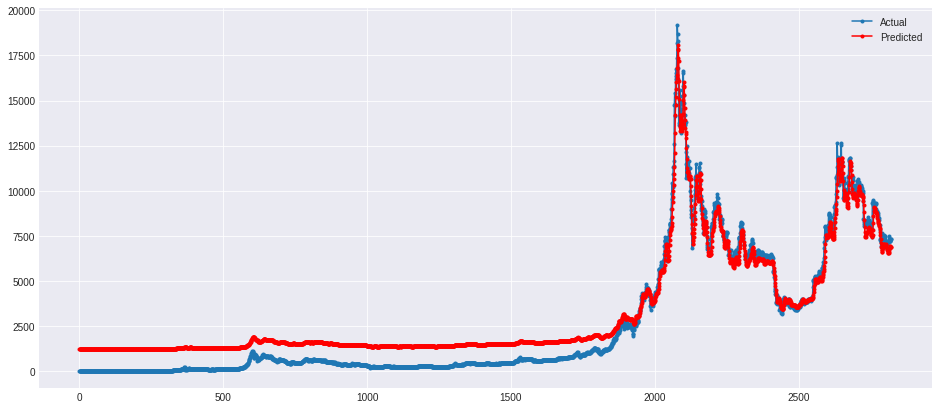

In [111]:
plt.figure(figsize=(16,7))
plt.plot(y_train_inv.flatten(), marker='.', label="Actual")
plt.plot(train_predict_inv.flatten(), 'r', marker='.', label="Predicted")
plt.legend()

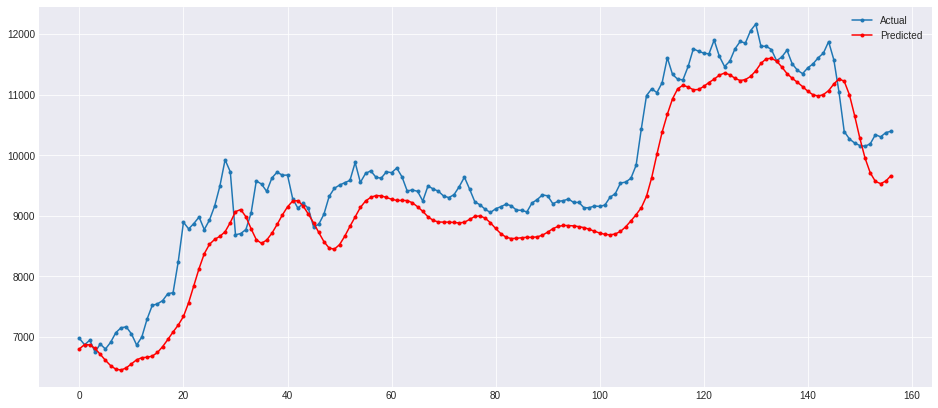

In [114]:
plt.figure(figsize=(16,7))
plt.plot(y_test_inv.flatten(), marker='.', label="Actual")
plt.plot(test_predict_inv.flatten(), 'r', marker='.', label="Predicted")
plt.legend()

In [115]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

train_RMSE = np.sqrt(mean_squared_error(y_train, train_predict))
test_RMSE = np.sqrt(mean_squared_error(y_test, test_predict))
train_MAE = np.sqrt(mean_absolute_error(y_train, train_predict))
test_MAE = np.sqrt(mean_absolute_error(y_test, test_predict))


print(f"Train RMSE: {train_RMSE}")
print(f"Train MAE: {train_MAE}")

print(f"Test RMSE: {test_RMSE}")
print(f"Test MAE: {test_MAE}")

Train RMSE: 0.05002352805181814
Train MAE: 0.21337441025499465
Test RMSE: 0.031823725886448495
Test MAE: 0.16552335941225416


In [116]:
test_data.shape

(258, 1)

In [117]:
lookback = len(test_data) - 100
x_input=test_data[lookback:].reshape(1,-1)
x_input.shape

(1, 100)

In [118]:
x_input

array([[0.50135107, 0.50680857, 0.50611375, 0.51004671, 0.50252873,
        0.49040564, 0.49122569, 0.49005254, 0.48172079, 0.49471156,
        0.49206669, 0.49014937, 0.48599147, 0.48468632, 0.48714124,
        0.49403472, 0.5022402 , 0.49195282, 0.4810431 , 0.47841309,
        0.47456507, 0.47184632, 0.47502431, 0.47683754, 0.47894088,
        0.47766879, 0.47386645, 0.47373395, 0.47231665, 0.48004879,
        0.4830018 , 0.48698126, 0.48615687, 0.47939465, 0.48143067,
        0.48199038, 0.48347641, 0.48044579, 0.48053383, 0.47585522,
        0.47598822, 0.47740834, 0.47704717, 0.47823839, 0.48499877,
        0.48802855, 0.49717381, 0.49801705, 0.50126549, 0.51243327,
        0.54377873, 0.5724569 , 0.57823839, 0.57498307, 0.58345498,
        0.60499713, 0.59060117, 0.58651106, 0.58593457, 0.59747987,
        0.61262317, 0.61058339, 0.60893581, 0.60829921, 0.62015157,
        0.60623057, 0.59740935, 0.60195372, 0.61260273, 0.6189534 ,
        0.61759268, 0.62824852, 0.63393972, 0.61

In [119]:
  
lookback, len(test_data)

(158, 258)

In [120]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()
temp_input

[0.501351065536594,
 0.5068085655581387,
 0.5061137476714974,
 0.5100467085119611,
 0.5025287305221993,
 0.49040564268682757,
 0.4912256871005414,
 0.4900525440407249,
 0.4817207865246184,
 0.49471155721375387,
 0.49206668693392197,
 0.49014937043771084,
 0.48599147284717953,
 0.4846863221380416,
 0.4871412356367034,
 0.4940347155603073,
 0.502240198384573,
 0.4919528231205808,
 0.4810430972233219,
 0.4784130911861269,
 0.474565071073295,
 0.47184631713472996,
 0.47502430827658826,
 0.47683754319348787,
 0.4789408804378321,
 0.4776687916685907,
 0.47386645325764637,
 0.47373394997816465,
 0.47231664872874224,
 0.48004879212310164,
 0.48300179669796295,
 0.4869812585071819,
 0.48615687473717517,
 0.4793946536451506,
 0.4814306734059727,
 0.4819903772045732,
 0.4834764074591186,
 0.4804457907713101,
 0.48053383331012844,
 0.47585522119656976,
 0.47598822202217106,
 0.47740833607275807,
 0.47704716959921983,
 0.47823838729650475,
 0.484998771503831,
 0.4880285456929933,
 0.497173813329052

In [121]:
len(temp_input)

100

In [122]:
# demonstrate prediction for next 100 days
from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<30):
    
    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = regressor.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = regressor.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

[0.51400834]
101
1 day input [0.50680857 0.50611375 0.51004671 0.50252873 0.49040564 0.49122569
 0.49005254 0.48172079 0.49471156 0.49206669 0.49014937 0.48599147
 0.48468632 0.48714124 0.49403472 0.5022402  0.49195282 0.4810431
 0.47841309 0.47456507 0.47184632 0.47502431 0.47683754 0.47894088
 0.47766879 0.47386645 0.47373395 0.47231665 0.48004879 0.4830018
 0.48698126 0.48615687 0.47939465 0.48143067 0.48199038 0.48347641
 0.48044579 0.48053383 0.47585522 0.47598822 0.47740834 0.47704717
 0.47823839 0.48499877 0.48802855 0.49717381 0.49801705 0.50126549
 0.51243327 0.54377873 0.5724569  0.57823839 0.57498307 0.58345498
 0.60499713 0.59060117 0.58651106 0.58593457 0.59747987 0.61262317
 0.61058339 0.60893581 0.60829921 0.62015157 0.60623057 0.59740935
 0.60195372 0.61260273 0.6189534  0.61759268 0.62824852 0.63393972
 0.61480937 0.61490586 0.61203588 0.60242505 0.60560053 0.61149789
 0.59976336 0.59427395 0.59128622 0.59629928 0.59967768 0.60496833
 0.60894375 0.61883331 0.60330389 0

In [123]:
len(price_series_scaled)

3181

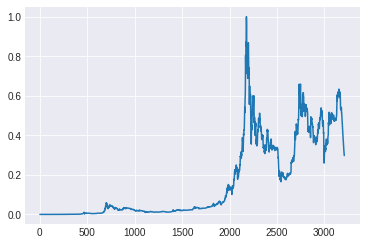

In [124]:
df_=price_series_scaled.tolist()
df_.extend(lst_output)
plt.plot(df_)

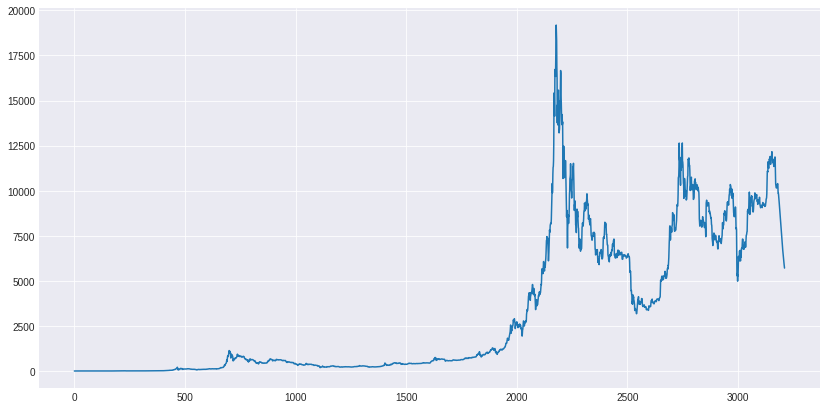

In [125]:
plt.figure(figsize=(14,7))
df_invscaled=scaler.inverse_transform(df_).tolist()
plt.plot(df_invscaled)